

```
# This is formatted as code
```

# **Problem and Data Understanding**

Cardiovascular diseases (CVDs) are the leading cause of death globally, responsible for an estimated 17.9 million deaths in 2019, which accounts for 32% of all global deaths, with 85% of these attributed to heart attacks and strokes. Over three-quarters of CVD-related deaths occur in low- and middle-income countries. Risk factors for CVD include unhealthy diet, physical inactivity, tobacco use, harmful alcohol consumption, and air pollution. These factors lead to intermediate risks like high blood pressure, elevated blood glucose and lipids, and obesity. Early detection is crucial for managing CVD through lifestyle changes and medications. Common CVDs include coronary heart disease, cerebrovascular disease, peripheral arterial disease, rheumatic heart disease, congenital heart disease, and deep vein thrombosis. Heart attacks and strokes often result from blockages in blood vessels, typically caused by fatty deposits. Symptoms of heart attacks include chest pain, discomfort in the arms, jaw, or back, and shortness of breath, while strokes present with sudden weakness, numbness, confusion, and difficulty speaking or seeing. Preventing CVD involves addressing these risk factors, promoting healthy behaviors, improving environmental conditions, and managing underlying conditions like hypertension, diabetes, and high cholesterol.


**Demographic**
- Sex: male or female (Nominal)
- Age: age of the patient (Continuous)



**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day (Continuous)


**Medical (history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
-  Diabetes: whether or not the patient had diabetes (Nominal)


**Medical (current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

# **Data Preparation**

## **Checking Precondition**

In [ ]:
# load important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns # for correlation matrix

In [ ]:
# read data
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# finding the shape of the data
df.shape

(4238, 16)

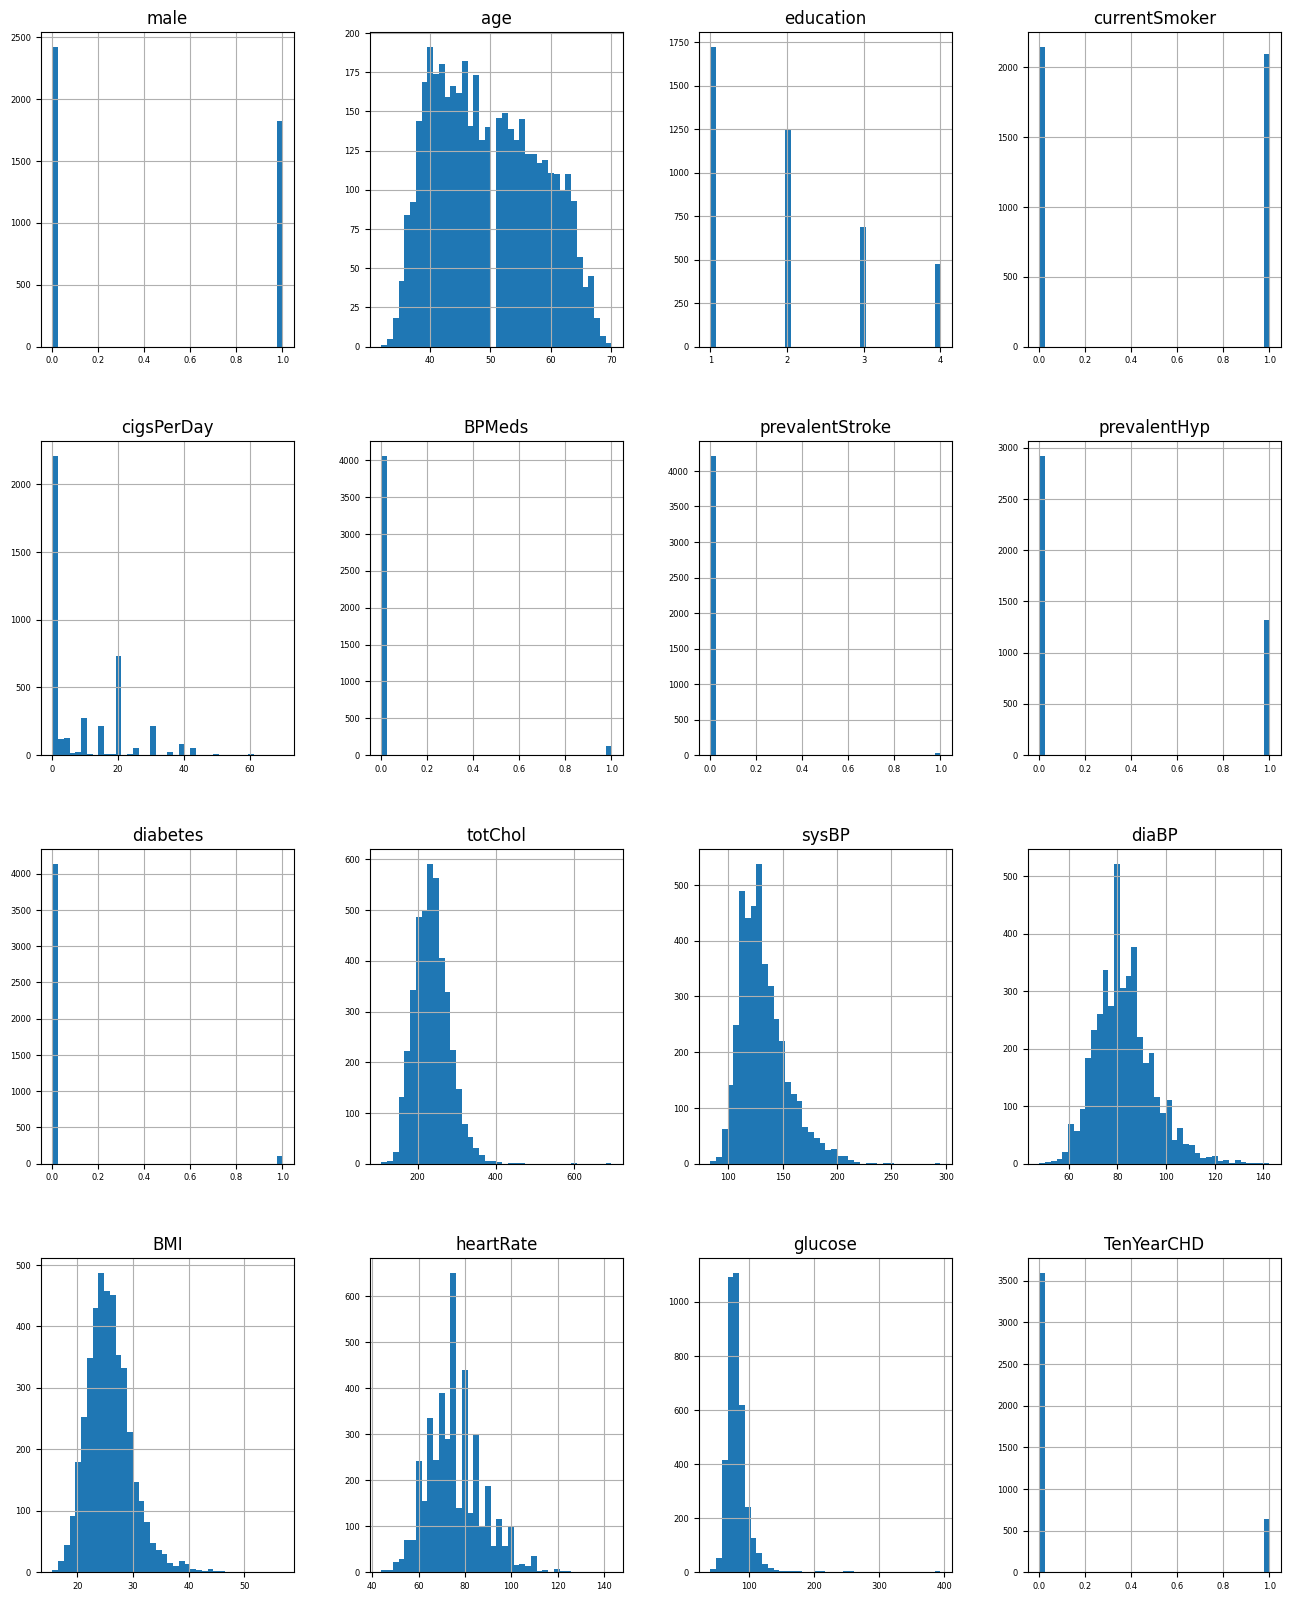

In [ ]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

- Gender (male)
The dataset has more males than females.
- Age
The distribution is roughly bell-shaped, indicating that most participants are middle-aged, concentrated around 40–60 years.
- Education
Most participants fall into one or two education levels, suggesting that certain education categories dominate.
- Current Smoker (currentSmoker)
The dataset includes a significant number of current smokers.
- Cigarettes Per Day (cigsPerDay)
Right-skewed distribution, with most participants smoking very few or no cigarettes daily, but some smoking significantly more.
- Blood Pressure Medication (BPMeds)
Most participants are not on blood pressure medication.
- Prevalent Stroke (prevalentStroke)
Very few participants have a history of stroke.
- Diabetes
Most participants do not have diabetes.
- Total Cholesterol (totChol)
Right-skewed distribution, with most participants having cholesterol levels clustered around the normal range (200–300 mg/dL).
- Systolic Blood Pressure (sysBP)
Right-skewed distribution, with a cluster around normal levels (120–140 mmHg), but some participants have very high systolic pressure.
- Diastolic Blood Pressure (diaBP)
Slightly right-skewed, with most values in the normal range (70–90 mmHg).
- Body Mass Index (BMI)
Normal distribution with a peak around 25–30, indicating many participants are in the overweight category.
- Heart Rate (heartRate)
Bell-shaped distribution, centered around 70–80 beats per minute, indicating normal heart rates for most participants.
- Glucose
Right-skewed, with most values clustered in the normal range, but a few very high glucose levels suggest some participants might have diabetes.
- Ten-Year Coronary Heart Disease (TenYearCHD)
Very few participants experienced CHD, indicating an imbalanced target variable.
- BMI Class (BMI_class)
Most participants fall into underweight or  overweight

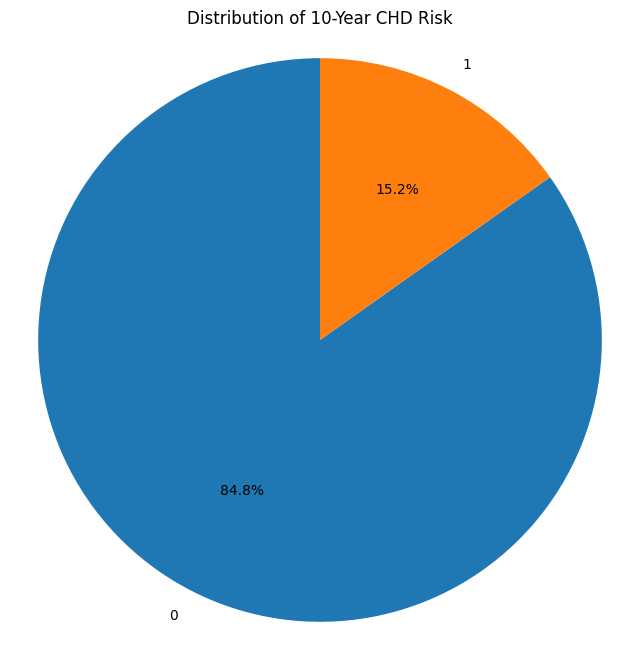

In [ ]:
risk_counts = df['TenYearCHD'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of 10-Year CHD Risk')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-5-de5084e2b185>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df, x='age', hue='TenYearCHD', multiple='stack', palette=pink_shades)


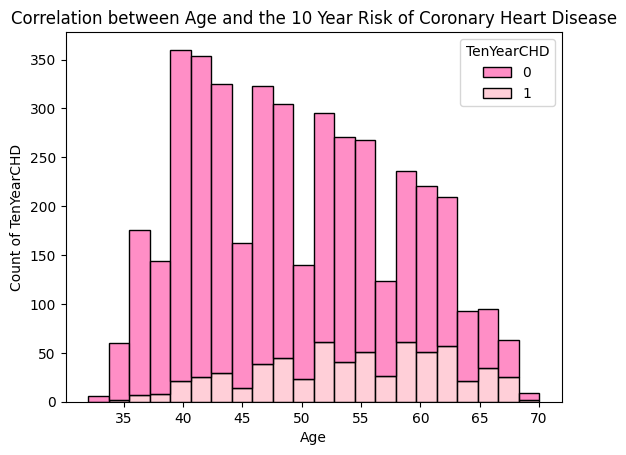

In [ ]:
# finding the age distribution of people with 10 year risk of coronary heart disease
pink_shades = ['#FF69B4', '#FFC0CB',  '#DB7093']
sns.histplot(data=df, x='age', hue='TenYearCHD', multiple='stack', palette=pink_shades)
plt.xlabel('Age')
plt.ylabel('Count of TenYearCHD')
plt.title('Correlation between Age and the 10 Year Risk of Coronary Heart Disease')
plt.show()

- Proportion of CHD Cases Increases with Age:
As age increases, the proportion of individuals with TenYearCHD = 1 (light pink) becomes more significant, especially after age 50.
- Younger age groups (30–40) have very few cases of CHD (TenYearCHD = 1).


## **Identifying Problems**

In [ ]:
# checking the non-null variable and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
# checking missing values
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
# validate the categorical datas have consistent format
df['male'].value_counts()
df['currentSmoker'].value_counts()
df['BPMeds'].value_counts()
df['prevalentStroke'].value_counts()
df['diabetes'].value_counts()
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3594
1,644


**Problems:**
1. Wrong data type: BPMeds (floats) where it is nominal variable (0/1) that supposed to be int
2. Missing values: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose

## **Tidy up the data**

**Fixing data type**

In [ ]:
# there are a lot of null so we have to do computation before converting
df['BPMeds'].isnull().sum()

53

In [ ]:
# prompt: replacing the type of BPMeds from float to int, but first we have to input the missing value with mode

# Fill missing 'BPMeds' values with the mode
bpm_mode = df['BPMeds'].mode()[0]
df['BPMeds'].fillna(bpm_mode, inplace=True)

# Convert 'BPMeds' to integer type
df['BPMeds'] = df['BPMeds'].astype(int)

<ipython-input-10-6d978f8911b5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPMeds'].fillna(bpm_mode, inplace=True)


In [ ]:
bpm_mode = df['BPMeds'].mode()
if isinstance(bpm_mode, pd.Series):
    bpm_mode = bpm_mode.iloc[0]

In [ ]:
df['BPMeds'].fillna(bpm_mode, inplace=True)

<ipython-input-12-ace569f514fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPMeds'].fillna(bpm_mode, inplace=True)


In [ ]:
df['BPMeds'] = df['BPMeds'].astype(int)

In [ ]:
print(df['BPMeds'].value_counts())
print(df['BPMeds'].isnull().sum()) # Verify no nulls remain

BPMeds
0    4114
1     124
Name: count, dtype: int64
0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4238 non-null   int64  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 529.9 KB


**Missing values**

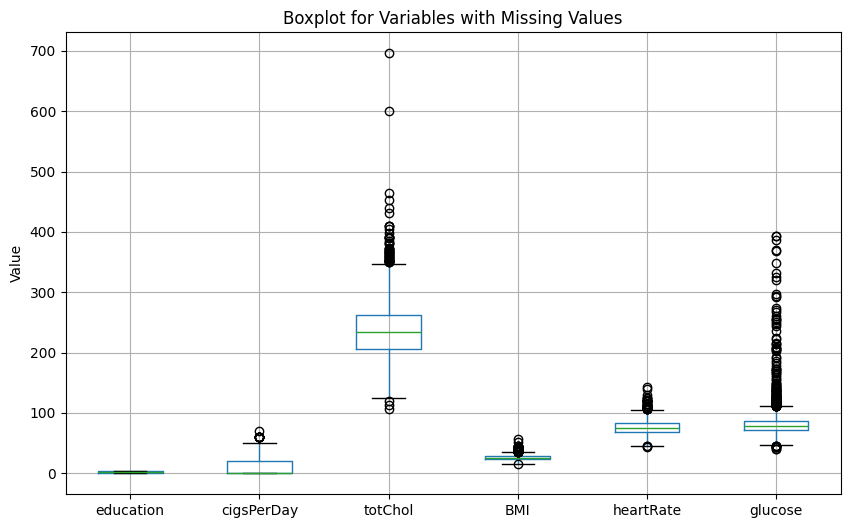

In [ ]:
boxplot = df.boxplot(column=['education', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose'], figsize=(10, 6))
plt.title("Boxplot for Variables with Missing Values")
plt.ylabel("Value")
plt.show()

No outlier: education (mean)

With Outlier: cigsPerDay, totChol, BMI, heartRate, glucose

In [ ]:
# finding median and mean
columns = ['education', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

for col in columns:
    if col == 'education':  # mean for no outlier
        fill_value = df[col].mean()
        print(f"Mean of {col}: {fill_value}")
    else:  # median for variable with outliers
        fill_value = df[col].median()
        print(f"Median of {col}: {fill_value}")

Mean of education: 1.9789499153157513
Median of cigsPerDay: 0.0
Median of totChol: 234.0
Median of BMI: 25.4
Median of heartRate: 75.0
Median of glucose: 78.0


In [ ]:
# inpute missing value
df['education'] = df['education'].fillna(1.979471448796602)
df['cigsPerDay'] = df['cigsPerDay'].fillna(0.0)
df['totChol'] = df['totChol'].fillna(234.0)
df['BMI'] = df['BMI'].fillna(25.4)
df['heartRate'] = df['heartRate'].fillna(75.0)
df['glucose'] = df['glucose'].fillna(78.0)

In [ ]:
# validate
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

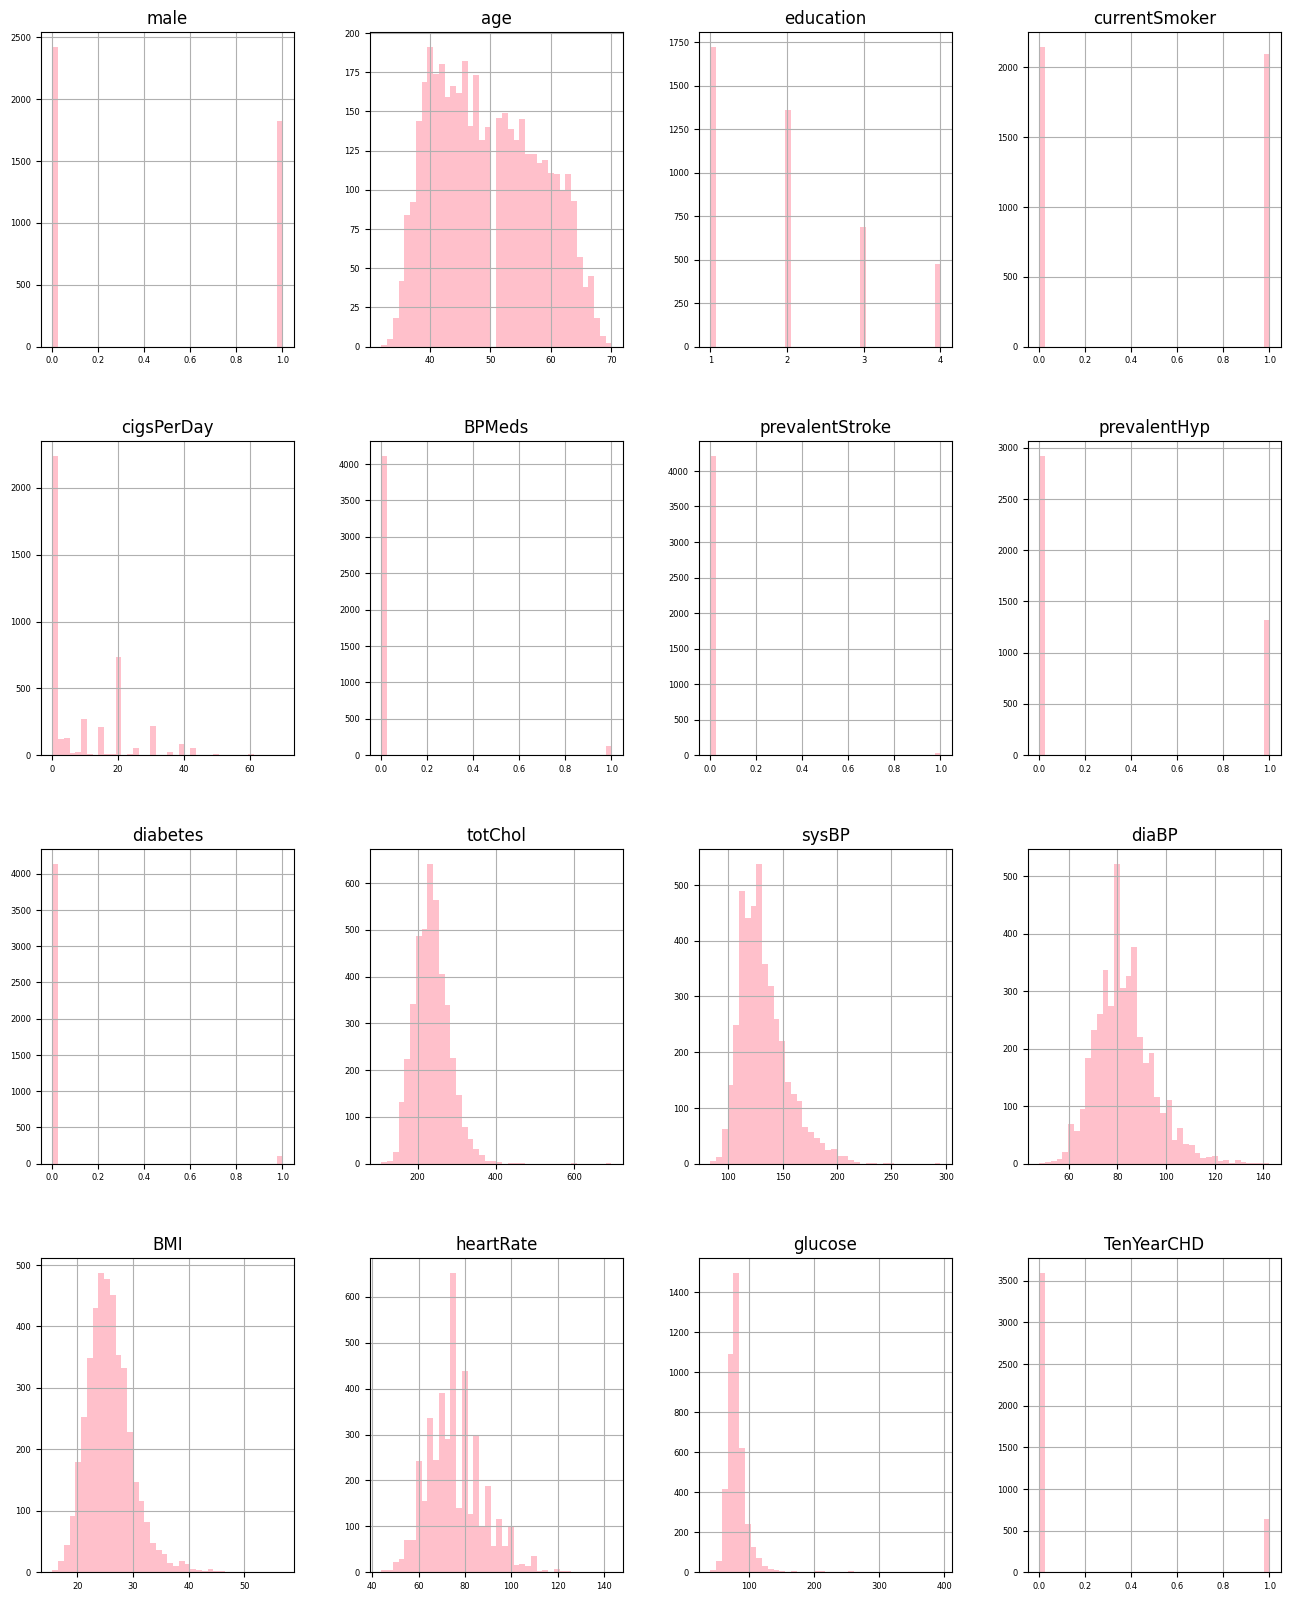

In [ ]:
# see the distrubution after data cleaning
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6, color='pink')

# **Feature Engineering**

## **Label Encoding**

In [ ]:
# create the 'BMI_class' column based on BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'healthy'
    elif 25 <= bmi <= 29.9:
        return 'overweight'
    else:
        return 'obesity'

df['BMI_class'] = df['BMI'].apply(categorize_bmi)

In [ ]:
df['BMI_class'].value_counts()

,count
BMI_class,
healthy,1832
overweight,1759
obesity,590
underweight,57


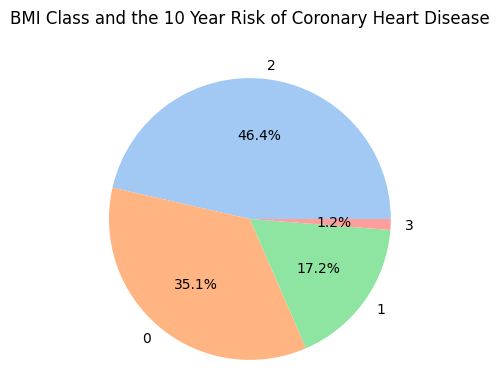

In [ ]:
tenyear = df[df['TenYearCHD'] == 1]
bmi_class_counts = tenyear['BMI_class'].value_counts()
labels_pie = bmi_class_counts.index.tolist()

plt.figure(figsize=(4, 4))
plt.pie(bmi_class_counts, labels=labels_pie, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('BMI Class and the 10 Year Risk of Coronary Heart Disease', pad=30)
plt.show()

1. underweight = 0
2. normal = 1
3. overweight = 2
4. obesity = 3

- Overweight categories are likely contributing significantly to the 10-year CHD risk.
- A smaller percentage of individuals in the healthy BMI category may also have CHD risk due to other factors (age, blood pressure, smoking habits, etc.).

In [ ]:
from sklearn import preprocessing
label= preprocessing.LabelEncoder()
df['BMI_class'] = label.fit_transform(df['BMI_class'])

In [ ]:
df['BMI_class']

,BMI_class
0,2
1,2
2,2
3,2
4,0
...,...
4233,2
4234,0
4235,0
4236,0


In [ ]:
# label encoding for systolic blood pressure
# create the 'BMI_class' column based on BMI values
def categorize_sys(sys):
    if sys < 120:
        return 'normal'
    elif 120 <= sys <= 129:
        return 'elevated'
    elif 130 <= sys <= 139:
        return 'hypertension stage 1'
    elif 140 <= sys >= 179:
        return 'hypertension stage 2'
    else:
      return 'hypertension crisis'

df['Sys_class'] = df['sysBP'].apply(categorize_sys)

In [ ]:
df['Sys_class'].value_counts()

,count
Sys_class,
normal,1279
hypertension crisis,1119
elevated,936
hypertension stage 1,726
hypertension stage 2,178


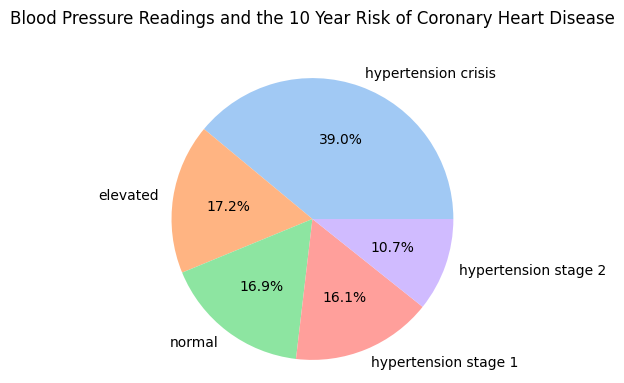

In [ ]:
tenyear = df[df['TenYearCHD'] == 1]
sys_class_counts = tenyear['Sys_class'].value_counts()
labels_pie2 = sys_class_counts.index.tolist()

plt.figure(figsize=(4, 4))
plt.pie(sys_class_counts, labels=labels_pie2, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Blood Pressure Readings and the 10 Year Risk of Coronary Heart Disease', pad=30)
plt.show()

In [ ]:
from sklearn import preprocessing
label= preprocessing.LabelEncoder()
df['Sys_class'] = label.fit_transform(df['Sys_class'])

In [ ]:
df['Sys_class']

## **Data Normalization**

The column cigsPerDay is continuous, with a scale ranging from 0 to 70 and only a few outliers, making Min-Max Scaling appropriate. It transforms the data into a [0, 1] range.

In [ ]:
x = df['cigsPerDay']
x = (np.array(x)).reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x = minmax.fit_transform(x)
df['cigsPerDay'] = x

In [ ]:
df['cigsPerDay']

In [ ]:
# x2 = df['glucose']
# x2 = (np.array(x)).reshape(-1,1)
# x2 = minmax.fit_transform(x)
# df['glucose'] = x2
# df['glucose']

# **Checking Linearity**

In [ ]:
plt.figure(figsize = (11,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, fmt='.2f', cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **Splitting Data**

**Top Correlated Features with TenYearCHD:**
- Age (0.23): Positive correlation.
Older individuals tend to have a higher risk of coronary heart disease.
- sysBP (0.22): Positive correlation.
Higher systolic blood pressure is associated with increased heart disease risk.
- diaBP (0.18): Positive correlation.
Diastolic blood pressure also shows a weaker positive relationship with CHD.
- prevalentHyp (0.18): Positive correlation.
A history of hypertension increases the likelihood of CHD.
- glucose (0.12): Positive correlation.
Elevated blood glucose is linked to higher CHD risk.
- BMI (0.10): Weak positive correlation.
Higher BMI shows a slight association with CHD risk.



In [ ]:
input = df.drop('TenYearCHD', axis=1)
output = df['TenYearCHD']

80% training 20% testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.8, random_state = 0)

In [ ]:
print('train data: ', x_train.shape)
print('test data: ', x_test.shape)

# **Data Training**

In [ ]:
# for model accuracy test
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
# we put the models in loop to save times and to reduce repetition
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Extreme Gradient Boosting": XGBClassifier()
}

for name, model in models.items():
    print(f"~~~~~~~~~~~~~~~~~~~~~~ {name} ~~~~~~~~~~~~~~~~~~~~~~")
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))
    print("\n")

~~~~~~~~~~~~~~~~~~~~~~ Logistic Regression ~~~~~~~~~~~~~~~~~~~~~~
Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2881
           1       0.40      0.04      0.07       510

    accuracy                           0.85      3391
   macro avg       0.63      0.51      0.49      3391
weighted avg       0.79      0.85      0.79      3391



~~~~~~~~~~~~~~~~~~~~~~ Decision Tree ~~~~~~~~~~~~~~~~~~~~~~
Decision Tree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2881
           1       0.23      0.29      0.26       510

    accuracy                           0.75      3391
   macro avg       0.55      0.56      0.55      3391
weighted avg       0.77      0.75      0.76      3391



~~~~~~~~~~~~~~~~~~~~~~ Random Forest ~~~~~~~~~~~~~~~~~~~~~~
Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

        

In [ ]:
for name, model in models.items():
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")

Logistic Regression accuracy: 0.8469478030079622
Decision Tree accuracy: 0.7496313771748747
Random Forest accuracy: 0.8484222943084636
SVC accuracy: 0.8496018873488647
KNN accuracy: 0.8330875847832497
Naive Bayes accuracy: 0.8212916543792391
Extreme Gradient Boosting accuracy: 0.8257151282807431


From the report above we can conclude
1. Logistic Regression
2. Random Forest
3. SVM

has the highest accuracy in predicting the data

In [ ]:
# hyperparameter tuning
param_grids = {
    "Logistic Regression": {
        "penalty": ["l1", "l2"],
        "C": [0.1, 1, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    }
}

In [ ]:
models_to_tune = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# tune each model
best_models = {}
for name, model in models_to_tune.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring="accuracy",
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all processors
    )
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {name}: {grid_search.best_score_}\n")

Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best Cross-Validation Accuracy for Logistic Regression: 0.846508875739645

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy for Random Forest: 0.8465297598329272

Tuning SVC...
Best Parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy for SVC: 0.8417960320222763



In [ ]:
logisticBest = LogisticRegression(C=1, penalty='l2')
logisticBest.fit(x_train, y_train)
ylogistic_predictBest = logisticBest.predict(x_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, ylogistic_predictBest)}")
print(classification_report(ylogistic_predictBest, y_test))

Logistic Regression Accuracy: 0.8469478030079622
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3344
           1       0.04      0.40      0.07        47

    accuracy                           0.85      3391
   macro avg       0.51      0.63      0.49      3391
weighted avg       0.98      0.85      0.90      3391



In [ ]:
randomforestBest = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=100)
randomforestBest.fit(x_train, y_train)
yrandomforest_predictBest = randomforestBest.predict(x_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, yrandomforest_predictBest)}")
print(classification_report(yrandomforest_predictBest, y_test))

Random Forest Accuracy: 0.8498967856089649
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      3318
           1       0.07      0.51      0.13        73

    accuracy                           0.85      3391
   macro avg       0.53      0.68      0.52      3391
weighted avg       0.97      0.85      0.90      3391



In [ ]:
svmBest = SVC(C=0.1, gamma='scale', kernel='linear')
svmBest.fit(x_train, y_train)
ysvm_predictBest = svmBest.predict(x_test)

print(f"SVC Accuracy: {accuracy_score(y_test, ysvm_predictBest)}")
print(classification_report(ysvm_predictBest, y_test))

SVC Accuracy: 0.8496018873488647
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3391
           1       0.00      0.00      0.00         0

    accuracy                           0.85      3391
   macro avg       0.50      0.42      0.46      3391
weighted avg       1.00      0.85      0.92      3391



In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_ensemble = StackingClassifier(
    estimators=[
        ("Logistic Regression", logisticBest),
        ("Random Forest", randomforestBest),
        ("SVC", svmBest)
    ],
    final_estimator=LogisticRegression()  # Meta-model
)

# Train the stacking ensemble
stacking_ensemble.fit(x_train, y_train)

StackingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=300)),
                               ('SVC', SVC(C=0.1, kernel='linear'))],
                   final_estimator=LogisticRegression())

# **Final Model Evaluation**

In [ ]:
print(f"Final Accuracy: {stacking_ensemble.score(x_test, y_test)}")
print(classification_report(stacking_ensemble.predict(x_test), y_test))

Final Accuracy: 0.8507814803892657
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3379
           1       0.02      0.67      0.03        12

    accuracy                           0.85      3391
   macro avg       0.51      0.76      0.47      3391
weighted avg       1.00      0.85      0.92      3391



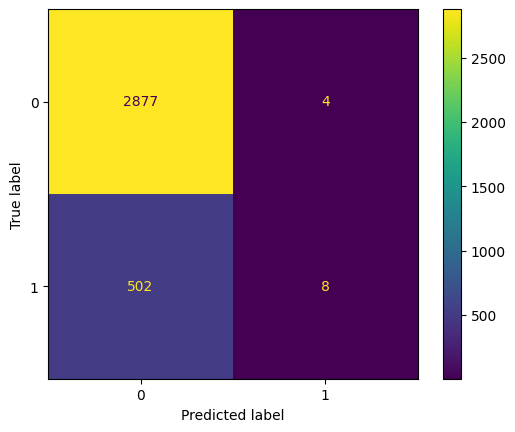

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(stacking_ensemble, x_test, y_test)
plt.show()

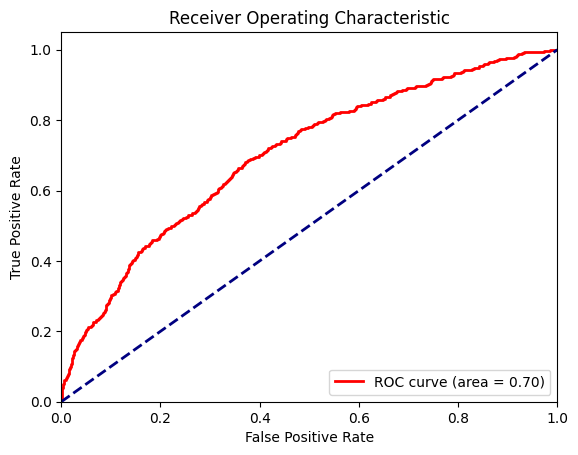

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = stacking_ensemble.predict_proba(x_test)[:, 1]  # probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()